In [282]:
import joblib
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [271]:
filename = "sim_vs_real_24_02_20_18_23_35"
logdir = f"../logdir/vs/0/{filename}"
data_dict = joblib.load(logdir)

obs_real = data_dict["real"]

In [283]:
filename = "sim_vs_real_24_02_27_09_45_27"
logdir = f"../logdir/explore_rod_sim/0/{filename}"
data_dict = joblib.load(logdir)

obs_sim = data_dict["sim"]

In [290]:
obs_real.keys(), obs_sim.keys()

(dict_keys(['lowdim_qpos', 'lowdim_ee', '213522250963_rgb', '213522250963_depth', '215122255213_rgb', '215122255213_depth', 'obj_pose']),
 dict_keys(['lowdim_qpos', 'lowdim_ee', 'front_rgb', 'front_depth', 'left_rgb', 'left_depth', 'obj_pose']))

In [273]:
# obs_real, obs_sim = data_dict["real"], data_dict["sim"]
# obs_real.keys(), obs_sim.keys()

Text(0.5, 1.0, 'object pos')

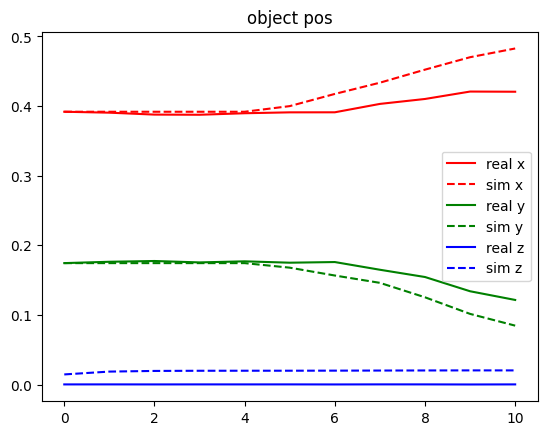

In [274]:
colors = ['red', 'green', 'blue']
labels = ['x', 'y', 'z']

plt.close()
for i, (c, l) in enumerate(zip(colors, labels)):
    plt.plot(obs_real["obj_pose"][:,i], label='real '+l, color=c)
    plt.plot(obs_sim["obj_pose"][:,i], label='sim '+l, color=c, linestyle='dashed')

plt.title('object pos')
plt.legend()

Text(0.5, 1.0, 'object euler')

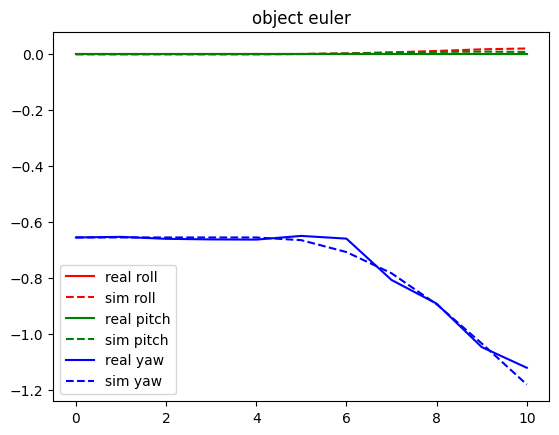

In [275]:
from utils.transformations import quat_to_euler
from utils.transformations_mujoco import quat_to_euler_mujoco

colors = ['red', 'green', 'blue']
labels = ['roll', 'pitch', 'yaw']

plt.close()
for i, (c, l) in enumerate(zip(colors, labels)):
    plt.plot(quat_to_euler(obs_real["obj_pose"][:,3:])[:,i], label='real '+l, color=c)
    plt.plot(quat_to_euler_mujoco(obs_sim["obj_pose"][:,3:])[:,i], label='sim '+l, color=c, linestyle='dashed')

plt.title('object euler')
plt.legend()

Text(0.5, 1.0, 'object euler')

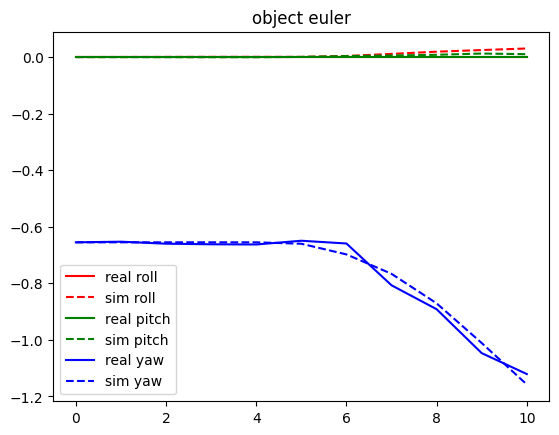

In [285]:
from utils.transformations import quat_to_euler
from utils.transformations_mujoco import quat_to_euler_mujoco

colors = ['red', 'green', 'blue']
labels = ['roll', 'pitch', 'yaw']

plt.close()
for i, (c, l) in enumerate(zip(colors, labels)):
    plt.plot(quat_to_euler(obs_real["obj_pose"][:,3:])[:,i], label='real '+l, color=c)
    plt.plot(quat_to_euler_mujoco(obs_sim["obj_pose"][:,3:])[:,i], label='sim '+l, color=c, linestyle='dashed')

plt.title('object euler')
plt.legend()

Text(0.5, 1.0, 'EE pos')

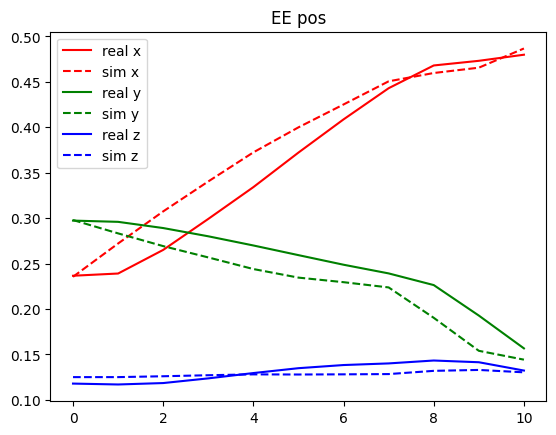

In [286]:
colors = ['red', 'green', 'blue']
labels = ['x', 'y', 'z']

plt.close()
for i, (c, l) in enumerate(zip(colors, labels)):
    plt.plot(obs_real["lowdim_ee"][:,i], label='real '+l, color=c)
    plt.plot(obs_sim["lowdim_ee"][:,i], label='sim '+l, color=c, linestyle='dashed')

plt.title('EE pos')
plt.legend()

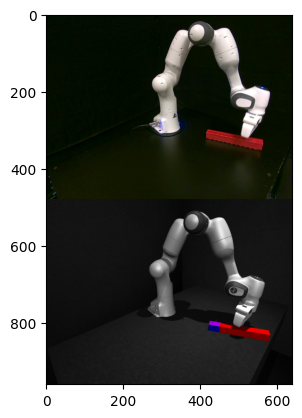

In [291]:
# plt.imshow(np.concatenate((obs_real["213522250963_rgb"][10], obs_sim["front_rgb"][10]), axis=0))
plt.imshow(np.concatenate((obs_real["215122255213_rgb"][10], obs_sim["left_rgb"][10]), axis=0))

In [278]:
obs_sim["front_rgb"].shape, obs_real["213522250963_rgb"].shape
np.concatenate((obs_sim["front_rgb"], obs_real["213522250963_rgb"]), axis=1).shape

((11, 480, 640, 3), (11, 480, 640, 3))

(11, 960, 640, 3)

In [279]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython import display

In [287]:
import imageio
imageio.mimwrite("tmp.gif", np.concatenate((obs_sim["front_rgb"], obs_real["213522250963_rgb"]), axis=2), duration=10)

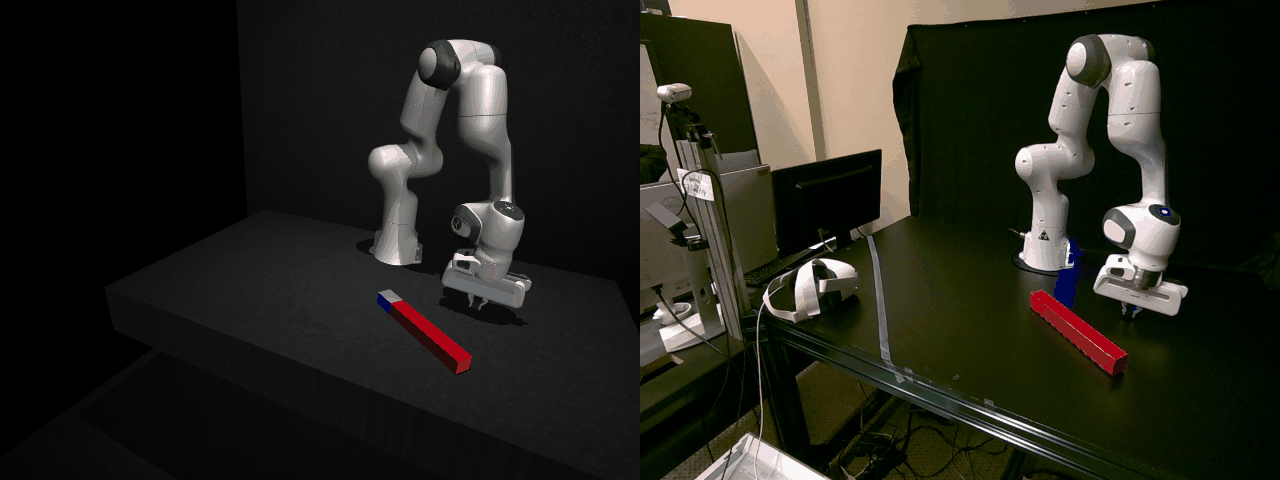

In [281]:
with open("tmp.gif",'rb') as f:
    display.Image(data=f.read(), format='png')

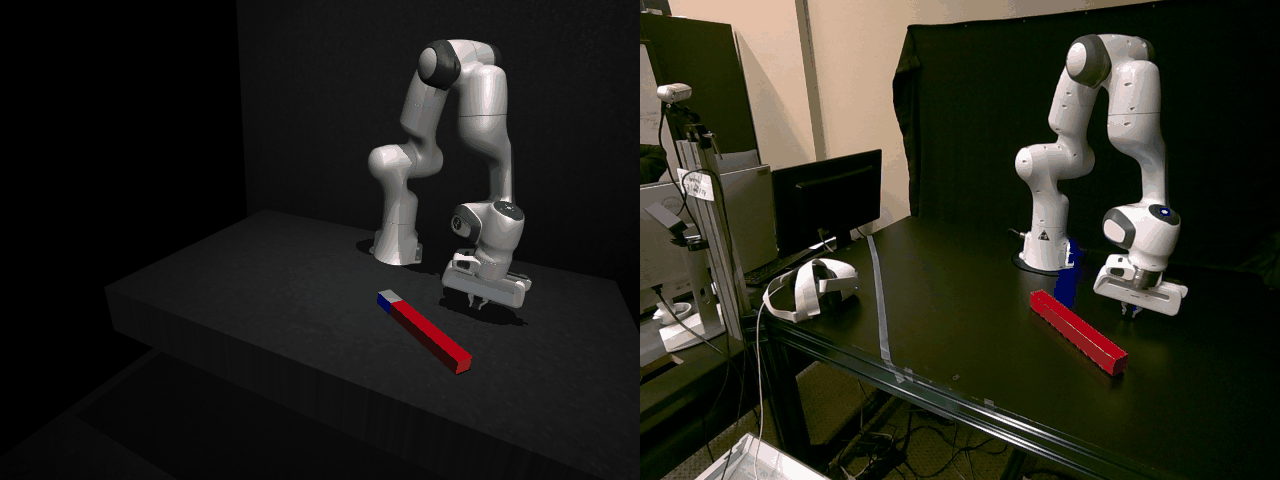

In [288]:
with open("tmp.gif",'rb') as f:
    display.Image(data=f.read(), format='png')